# Time-Weighted Averages of Continuously Compounded Rates

One of the key advantages of continuously compounded rates is that they can be time-weighted to calculate rates for longer periods.

## Key Property: Time Additivity

With continuously compounded rates, we can add the rate-time products:

- For rate $r_1$ applied over time $t_1$ and rate $r_2$ over time $t_2$:
  $e^{r_1 t_1} \cdot e^{r_2 t_2} = e^{r_1 t_1 + r_2 t_2}$

- This means the time-weighted average rate $r$ for the combined period is:
  $$r = \frac{r_1 \cdot t_1 + r_2 \cdot t_2}{t_1 + t_2}$$

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Example parameters
principal = 1000.0  # Initial investment
r1 = 0.05          # 5% continuously compounded for first period
t1 = 2.0           # 2 years
r2 = 0.08          # 8% continuously compounded for second period
t2 = 3.0           # 3 years

In [5]:
# Apply rates sequentially
intermediate = principal * math.exp(r1 * t1)
final_sequential = intermediate * math.exp(r2 * t2)

print(
    f"Sequential application:\n"
    f"Initial: ${principal:.2f}\n"
    f"After period 1 ({t1} years at {r1*100:.1f}%): ${intermediate:.2f}\n"
    f"After period 2 ({t2} years at {r2*100:.1f}%): ${final_sequential:.2f}"
)

Sequential application:
Initial: $1000.00
After period 1 (2.0 years at 5.0%): $1105.17
After period 2 (3.0 years at 8.0%): $1404.95


In [6]:
# Calculate time-weighted average rate
r_combined = (r1 * t1 + r2 * t2) / (t1 + t2)
total_time = t1 + t2

# Apply the combined rate
final_combined = principal * math.exp(r_combined * total_time)

print(f"Combined rate approach:\n"+
      f"Time-weighted average rate: {r_combined*100:.4f}%\n"+
      f"Total time: {total_time} years\n"+
      f"Final amount: ${final_combined:.2f}\n\n"+
      f"Difference: ${final_sequential - final_combined:.10f}")

Combined rate approach:
Time-weighted average rate: 6.8000%
Total time: 5.0 years
Final amount: $1404.95

Difference: $0.0000000000


## Formal Proof

For the time-weighted average to work, we need to show that:

$$e^{r_1 t_1} \cdot e^{r_2 t_2} = e^{r (t_1 + t_2)}$$

Taking natural logarithm of both sides:

$$r_1 t_1 + r_2 t_2 = r (t_1 + t_2)$$

Solving for $r$:

$$r = \frac{r_1 t_1 + r_2 t_2}{t_1 + t_2}$$

## Visualizing Time-Weighted Average Rates

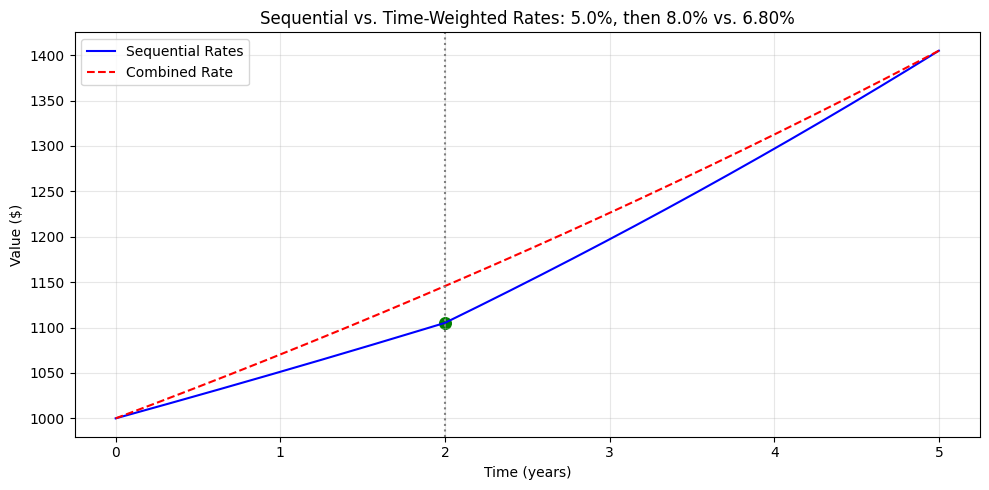

In [7]:
# Create time points for plotting
time_points = np.linspace(0, t1 + t2, 500)

# Calculate future values for sequential rates
future_values_seq = []
for t in time_points:
    if t <= t1:
        fv = principal * math.exp(r1 * t)
    else:
        fv = principal * math.exp(r1 * t1) * math.exp(r2 * (t - t1))
    future_values_seq.append(fv)

# Calculate values for combined rate
future_values_comb = [principal * math.exp(r_combined * t) for t in time_points]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(time_points, future_values_seq, 'b-', label='Sequential Rates')
plt.plot(time_points, future_values_comb, 'r--', label='Combined Rate')
plt.axvline(x=t1, color='gray', linestyle=':')
plt.scatter([t1], [intermediate], color='green', s=70)

plt.xlabel('Time (years)')
plt.ylabel('Value ($)')
plt.title(f'Sequential vs. Time-Weighted Rates: {r1*100:.1f}%, then {r2*100:.1f}% vs. {r_combined*100:.2f}%')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Extension to Multiple Rates

For multiple rates $r_1, r_2, ..., r_n$ over periods $t_1, t_2, ..., t_n$, the combined rate is:

$$r = \frac{\sum_{i=1}^{n} r_i t_i}{\sum_{i=1}^{n} t_i}$$

In [8]:
# Example with three rates
rates = [0.04, 0.06, 0.08]  # 4%, 6%, 8%
times = [1.0, 2.0, 1.5]     # 1, 2, 1.5 years
pv = 1000.0

# Sequential application
current_value = pv
for r, t in zip(rates, times):
    current_value *= math.exp(r * t)
    
# Combined rate
r_weighted = sum(r*t for r,t in zip(rates, times)) / sum(times)
total_time = sum(times)
combined_value = pv * math.exp(r_weighted * total_time)

print(f'Sequential result: ${current_value:.2f}')
print(f'Combined rate ({r_weighted*100:.4f}%) result: ${combined_value:.2f}')
print(f'Difference: ${current_value - combined_value:.10f}')

Sequential result: $1323.13
Combined rate (6.2222%) result: $1323.13
Difference: $0.0000000000


## Applications in Finance

This time-weighted averaging property makes continuously compounded rates particularly useful for:

1. **Yield curve construction** - Allows for smooth interpolation between rates at different maturities
2. **Forward rate calculations** - Simplifies extraction of implied forward rates
3. **Discount factor interpolation** - Provides consistent exponential interpolation of discount factors
4. **Duration calculations** - Helps in measuring interest rate sensitivity